In [1]:
from ray import tune

# INPUT = "/home/richard/repo/forks/meltingpot/results/optuna/coins/experiment_state-2024-02-05_22-24-11.json"

INPUT = "/scratch/users/k21075402/optuna_single/clean_up_simple_single/experiment_state-2024-04-19_13-38-31.json"

df = tune.ExperimentAnalysis(INPUT).results_df

2024-04-22 12:23:29,914	WARNING experiment_analysis.py:190 -- Failed to fetch metrics for 99 trial(s):
- PPO_9f6aede9_20000,10,0.00002,0.95,1,0.00016,0.1,2: FileNotFoundError('Could not fetch metrics for PPO_9f6aede9_20000,10,0.00002,0.95,1,0.00016,0.1,2: both result.json and progress.csv were not found at /scratch/users/k21075402/optuna_single/clean_up_simple_single/PPO_9f6aede9_20000,10,0.00002,0.95,1,0.00016,0.1,2_1_AlgorithmConfig__prior_exploration_config=None,disable_action_flattening=Fals_2024-04-19_13-38-31')
- PPO_f9d5511d_30000,6,0.00026,0.9,0.7,0.00065,0.3,2: FileNotFoundError('Could not fetch metrics for PPO_f9d5511d_30000,6,0.00026,0.9,0.7,0.00065,0.3,2: both result.json and progress.csv were not found at /scratch/users/k21075402/optuna_single/clean_up_simple_single/PPO_f9d5511d_30000,6,0.00026,0.9,0.7,0.00065,0.3,2_2_AlgorithmConfig__prior_exploration_config=None,disable_action_flattening=Fals_2024-04-19_14-00-35')
- PPO_ed857950_20000,29,0.00022,1,0.5,0.00057,0.3,6: File

In [2]:
[c for c in df.columns if "step" in c]

['num_agent_steps_sampled',
 'num_agent_steps_trained',
 'num_env_steps_sampled',
 'num_env_steps_trained',
 'num_env_steps_sampled_this_iter',
 'num_env_steps_trained_this_iter',
 'num_env_steps_sampled_throughput_per_sec',
 'num_env_steps_trained_throughput_per_sec',
 'timesteps_total',
 'num_steps_trained_this_iter',
 'agent_timesteps_total',
 'info/num_env_steps_sampled',
 'info/num_env_steps_trained',
 'info/num_agent_steps_sampled',
 'info/num_agent_steps_trained',
 'counters/num_env_steps_sampled',
 'counters/num_env_steps_trained',
 'counters/num_agent_steps_sampled',
 'counters/num_agent_steps_trained',
 'config/count_steps_by',
 'config/min_train_timesteps_per_iteration',
 'config/min_sample_timesteps_per_iteration']

In [3]:
cols = ['episode_reward_mean', 'training_iteration', 'timesteps_total', 'time_total_s', 'config/lr', 'config/lambda', 'config/clip_param', 'config/vf_clip_param', 
        'config/vf_loss_coeff', 'config/entropy_coeff', 'config/sgd_minibatch_size', 'config/num_sgd_iter']
df['time_total_s'] = df['time_total_s'].astype(int)
df['episode_reward_mean'] = df['episode_reward_mean'].round()
df[cols].sort_values(['episode_reward_mean'], ascending=False)

,episode_reward_mean,training_iteration,timesteps_total,time_total_s,config/lr,config/lambda,config/clip_param,config/vf_clip_param,config/vf_loss_coeff,config/entropy_coeff,config/sgd_minibatch_size,config/num_sgd_iter
trial_id,,,,,,,,,,,,
fa252ace,192.0,50,6000000,1378,0.000126,0.95,0.25,2,0.7,0.000102,20000,12
b2b36eb9,190.0,50,6000000,1369,0.000229,0.90,0.25,6,0.8,0.000908,5000,10
2295dd75,188.0,50,6000000,1377,0.000217,0.90,0.25,5,0.7,0.000315,10000,13
a7d42584,174.0,50,6000000,1258,0.000209,0.95,0.25,3,0.8,0.000102,15000,9
6dafeec1,164.0,50,6000000,1447,0.000111,0.95,0.20,10,0.7,0.000709,15000,13
...,...,...,...,...,...,...,...,...,...,...,...,...
fd471df2,1.0,25,3000000,676,0.000255,0.90,0.30,5,0.7,0.000333,5000,11
8435521b,1.0,25,3000000,591,0.000121,0.95,0.25,1,0.9,0.000552,25000,8
3a3e1c1e,0.0,25,3000000,688,0.000055,0.90,0.25,6,1.0,0.000535,10000,12


array([[<Axes: title={'center': 'episode_reward_mean'}>]], dtype=object)

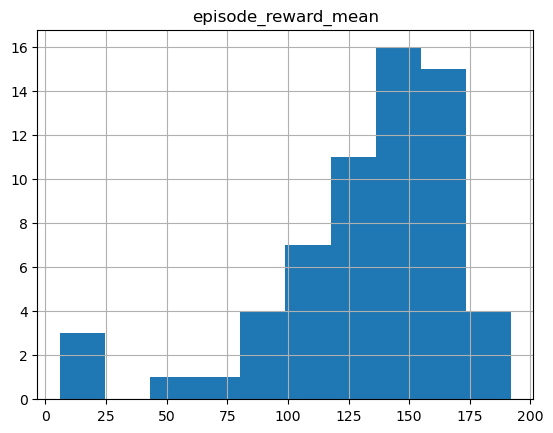

In [5]:
df[df['training_iteration'] == 50].hist('episode_reward_mean')

array([[<Axes: title={'center': 'episode_reward_mean'}>]], dtype=object)

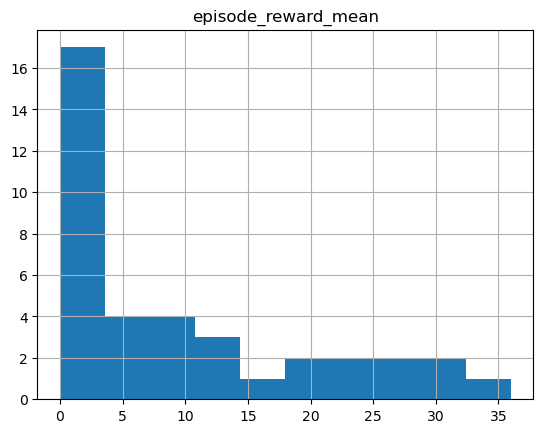

In [6]:
df[df['training_iteration'] == 25].hist('episode_reward_mean')